In [1]:
import json

import matplotlib.pyplot as plt

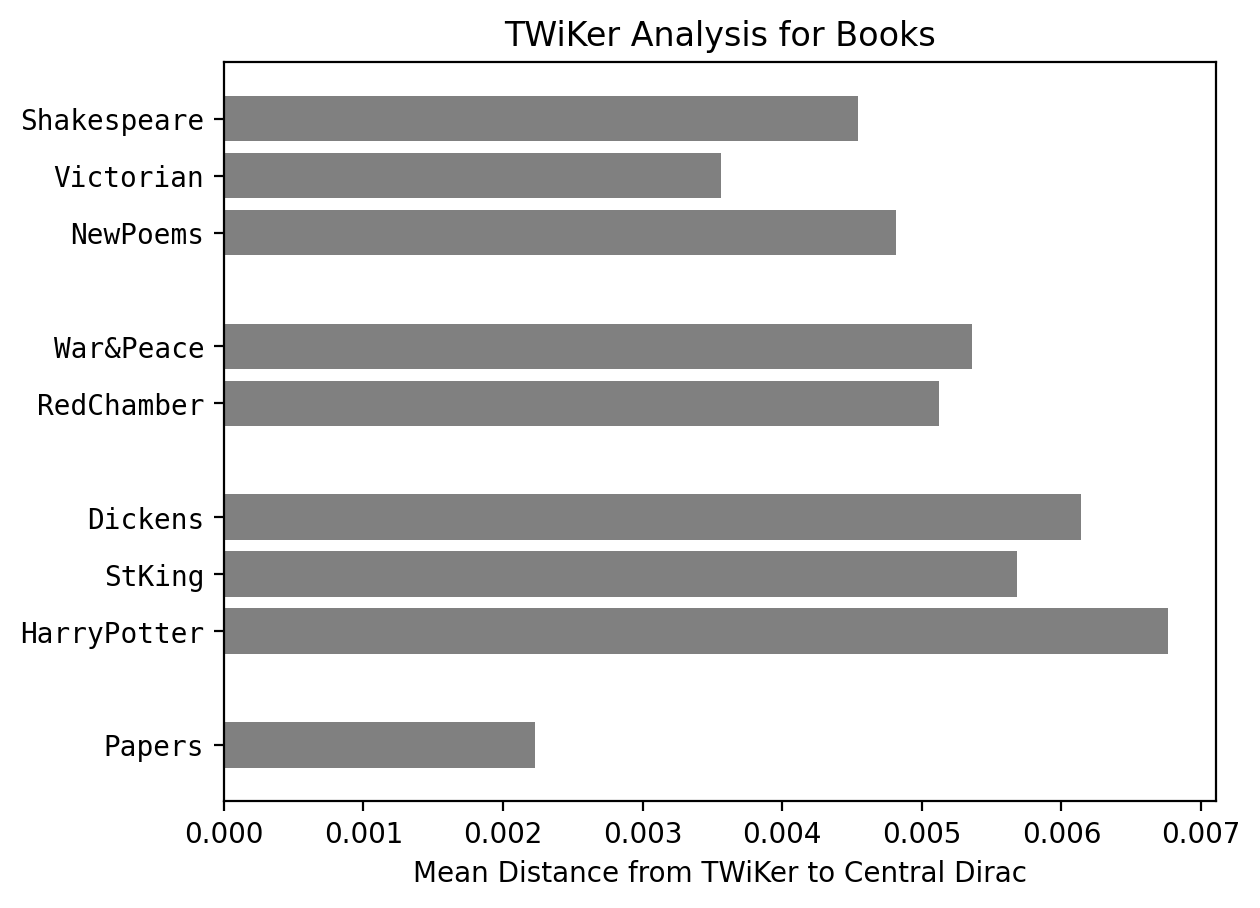

In [2]:
# Book dictionary
books = {
    "shakes": "Shakespeare",
    "victorian": "Victorian",
    "dikens": "Dickens",
    "warpeace": "War&Peace",
    "stone_Y": "RedChamber",
    "stephen": "StKing",
    "potter": "HarryPotter",
    "modern": "NewPoems",
    "articles": "Papers",
}

# Load JSON data
pos_dist_dict_book = {}
for book in books:
    with open(f"results/distance/{book}.json", "r") as file:
        pos_dist_dict_book[book] = json.load(file)

# Define groups
groups = [
    ["shakes", "victorian", "modern"],  # Group 1
    ["warpeace", "stone_Y"],  # Group 2
    ["dikens", "stephen", "potter"],  # Group 3
    ["articles"],  # Group 4
]

# Flatten for ordering
ordered_keys = [key for group in groups for key in group]
ordered_labels = [books[key] for key in ordered_keys]
ordered_values = [pos_dist_dict_book[key]["all"] for key in ordered_keys]

# Add spacing between groups
spaced_labels = []
spaced_values = []
group_spacer = 1  # Space between groups

pos = 0  # Current position
positions = []

for group in groups:
    for key in group:
        spaced_labels.append(books[key])
        spaced_values.append(pos_dist_dict_book[key]["all"])
        positions.append(pos)
        pos += 1  # Normal increment
    pos += group_spacer  # Add spacing after each group

# Plot
plt.figure(dpi=200)
plt.barh(positions, spaced_values, align="center", color="gray")
plt.yticks(positions, spaced_labels, fontname="DejaVu Sans Mono")
plt.xlabel("Mean Distance from TWiKer to Central Dirac")
plt.title("TWiKer Analysis for Books")
plt.gca().invert_yaxis()
plt.savefig("results/figs/books/all.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show()

In [3]:
classes = {
    "intj": "Interjection (Wow, Ha)",
    "propn": "Proper Noun (Harry, UK)",
    "noun": "Noun (apple, car)",
    "verb": "Verb (run, eat)",
    "adj": "Adjective (happy, tall)",
    "adv": "Adverb (quickly, softly)",
    "sconj": "Subord. Conj. (if, as)",
    "aux": "Auxiliary Verb (is, has)",
    "prop": "Preposition (in, of)",
    "pron": "Pronoun (she, they)",
    "cconj": "Coord. Conj. (and, or)",
    "det": "Determiner (the, an)"
}

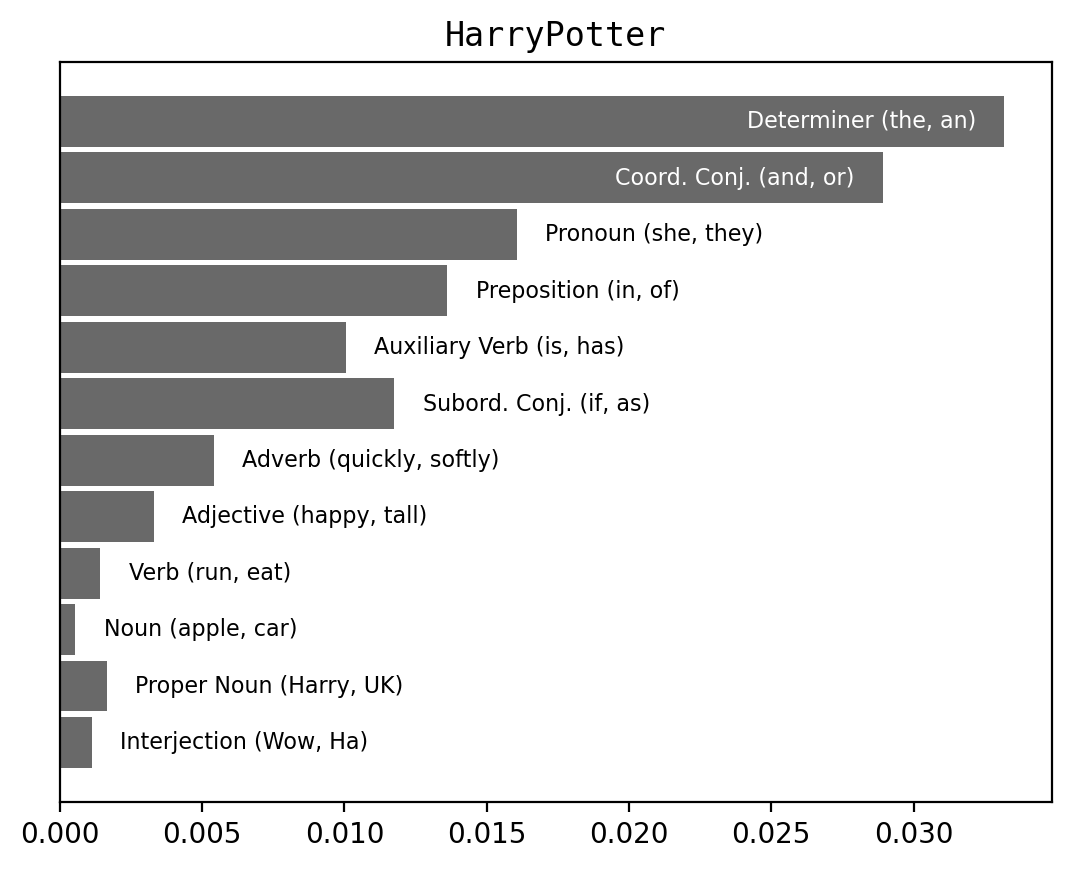

In [4]:
book = "potter"
left = ["Determiner (the, an)", "Coord. Conj. (and, or)"]

plt.figure(dpi=200)
values = [pos_dist_dict_book[book][k] for k in classes.keys()]
labels = list(classes.values())

plt.barh(labels, values, color="dimgray", height=0.9)  # Wider bars
plt.title(books[book], fontname="DejaVu Sans Mono")
plt.gca().set_yticks([])  # Hide y-ticks

for i, (label, value) in enumerate(zip(labels, values)):
    if label in left:
        plt.text(value - 0.001, i, f"{label}", va="center", ha="right", fontsize=8, color="white")
    else:
        plt.text(value + 0.001, i, f"{label}", va="center", ha="left", fontsize=8)

plt.savefig(f"results/figs/potter_show.pdf", bbox_inches="tight", pad_inches=0.02)
plt.show()


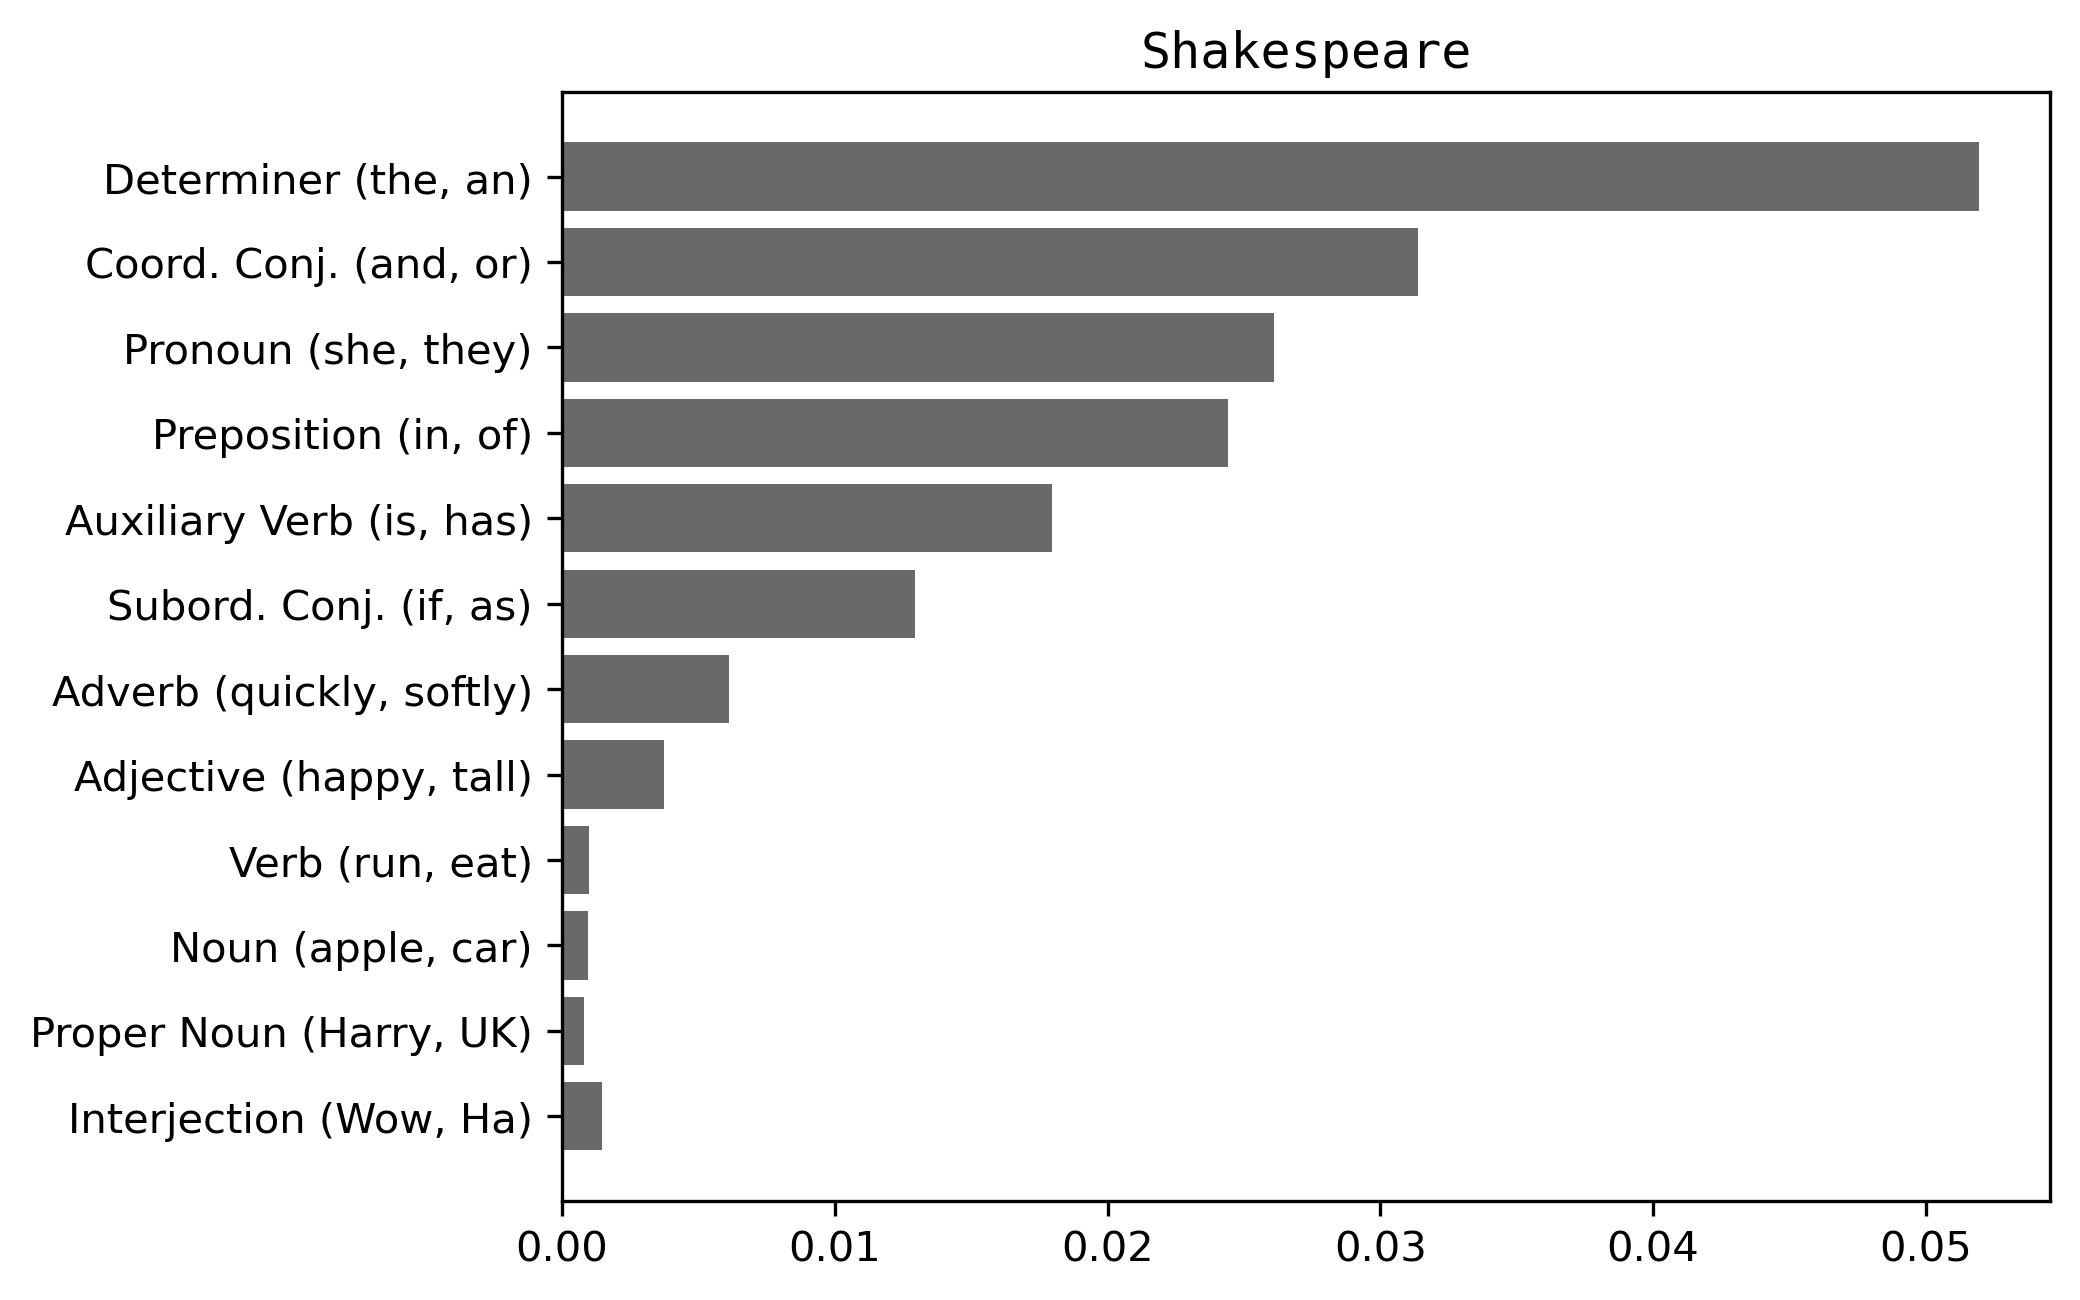

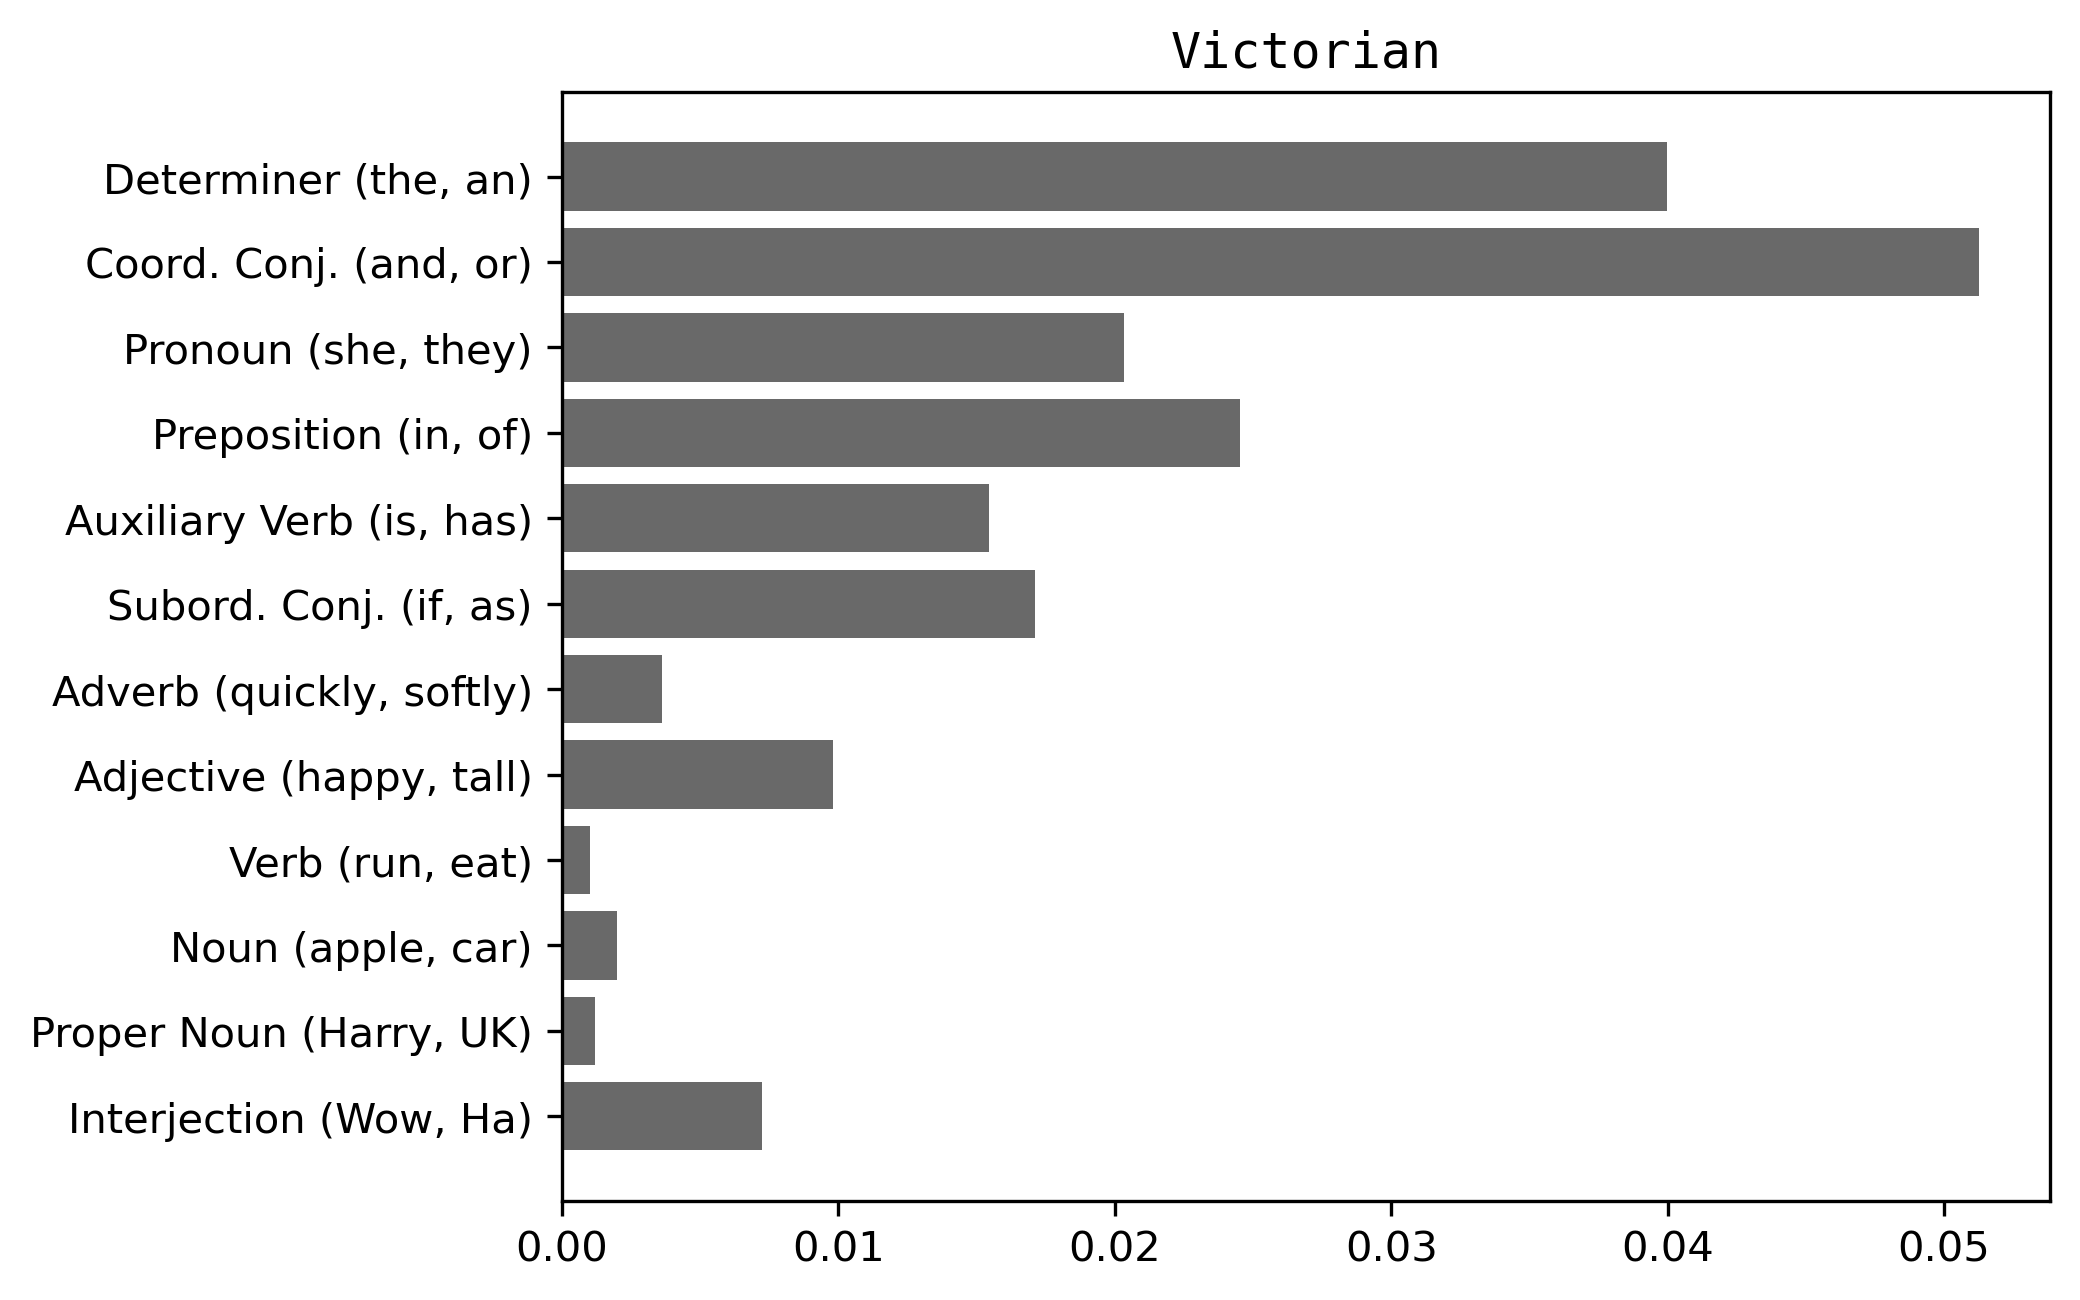

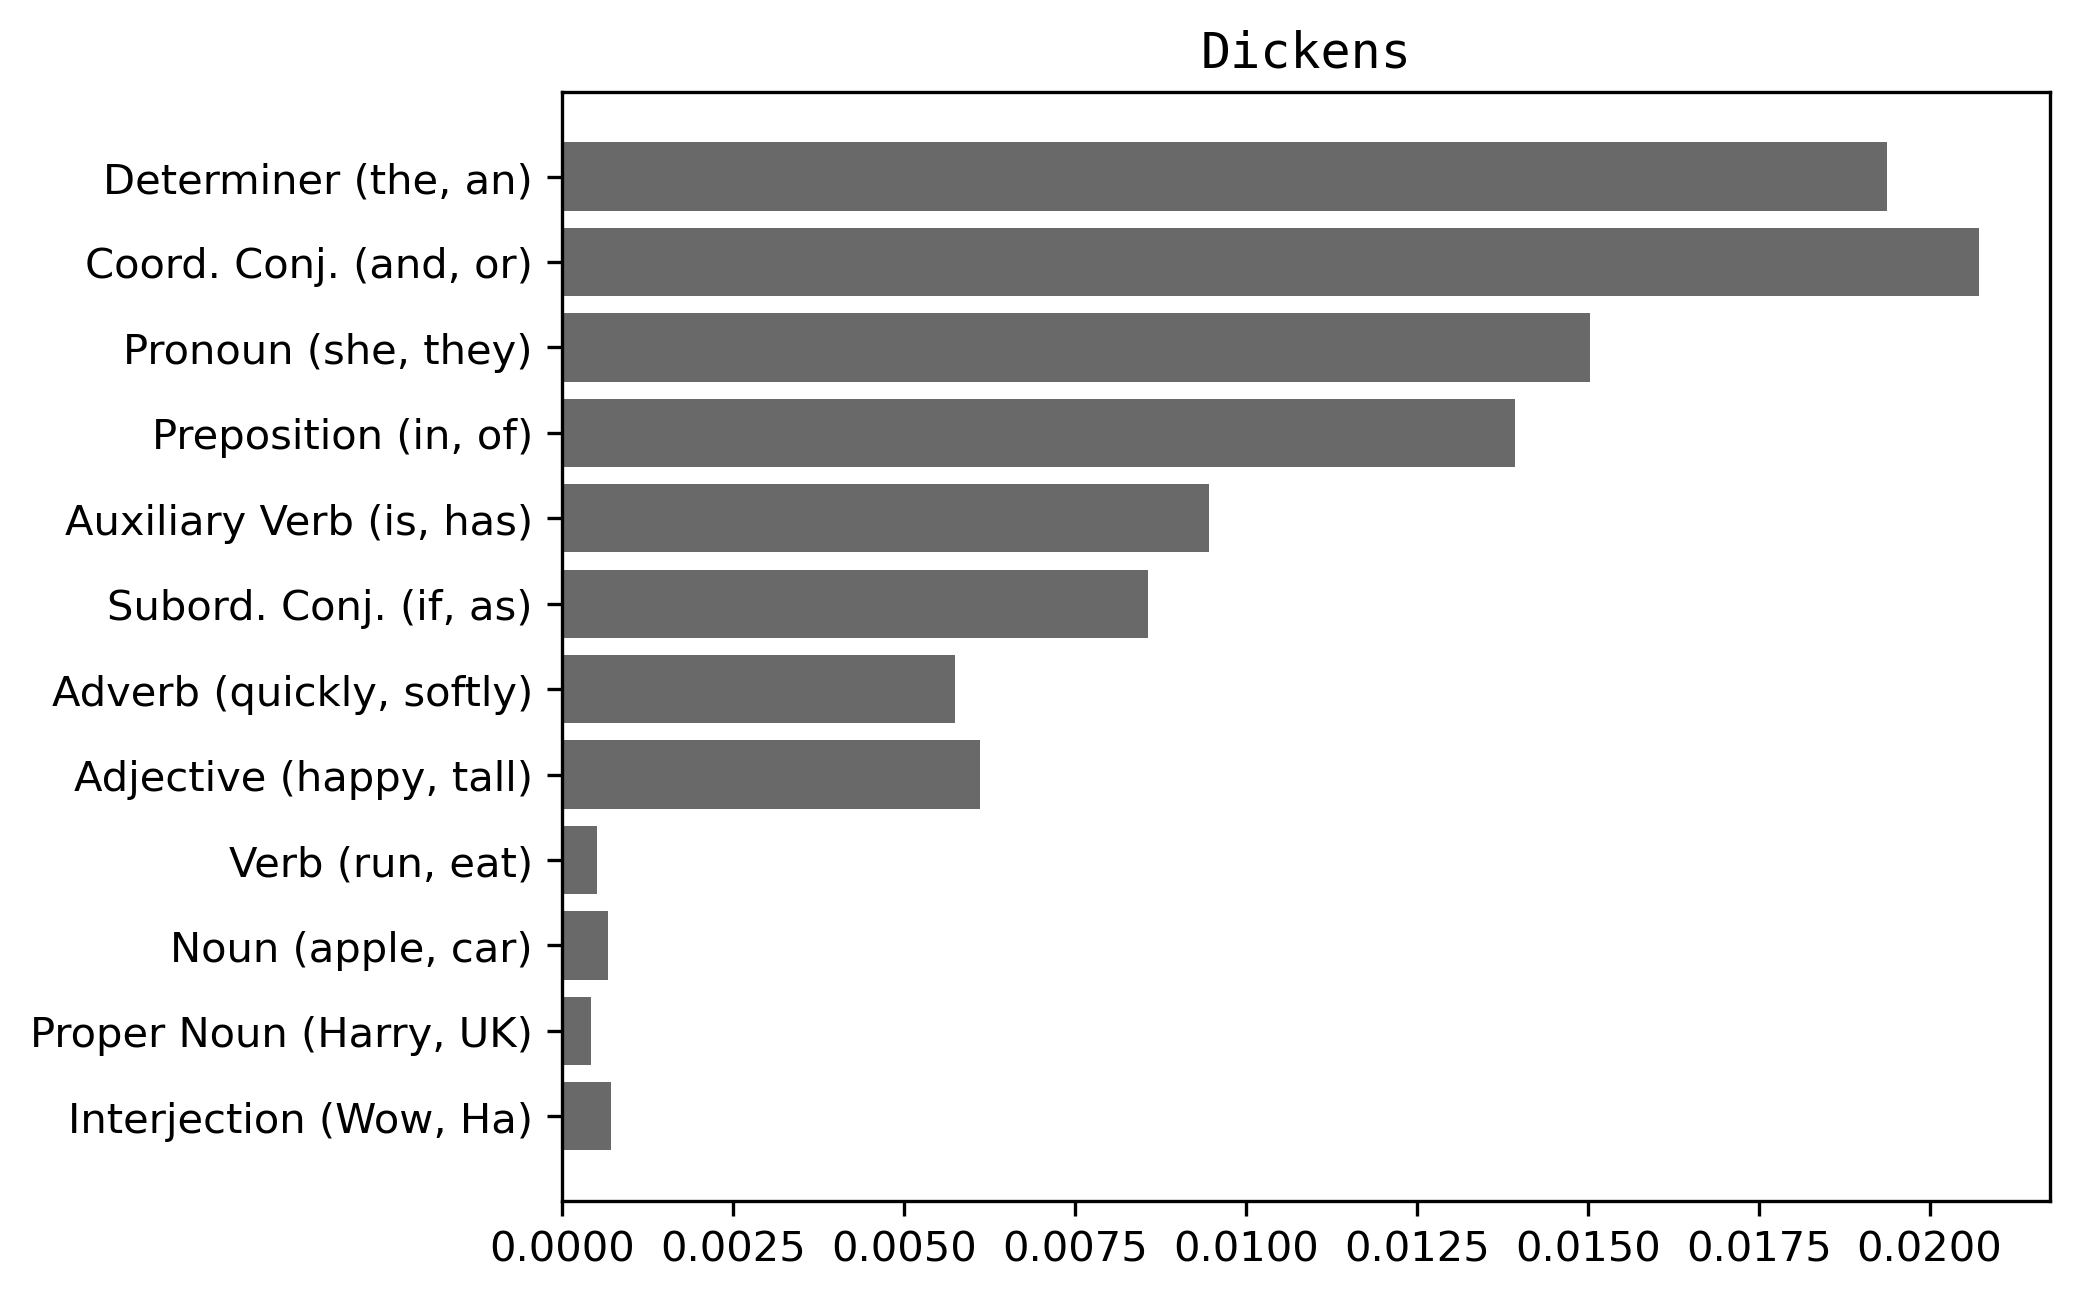

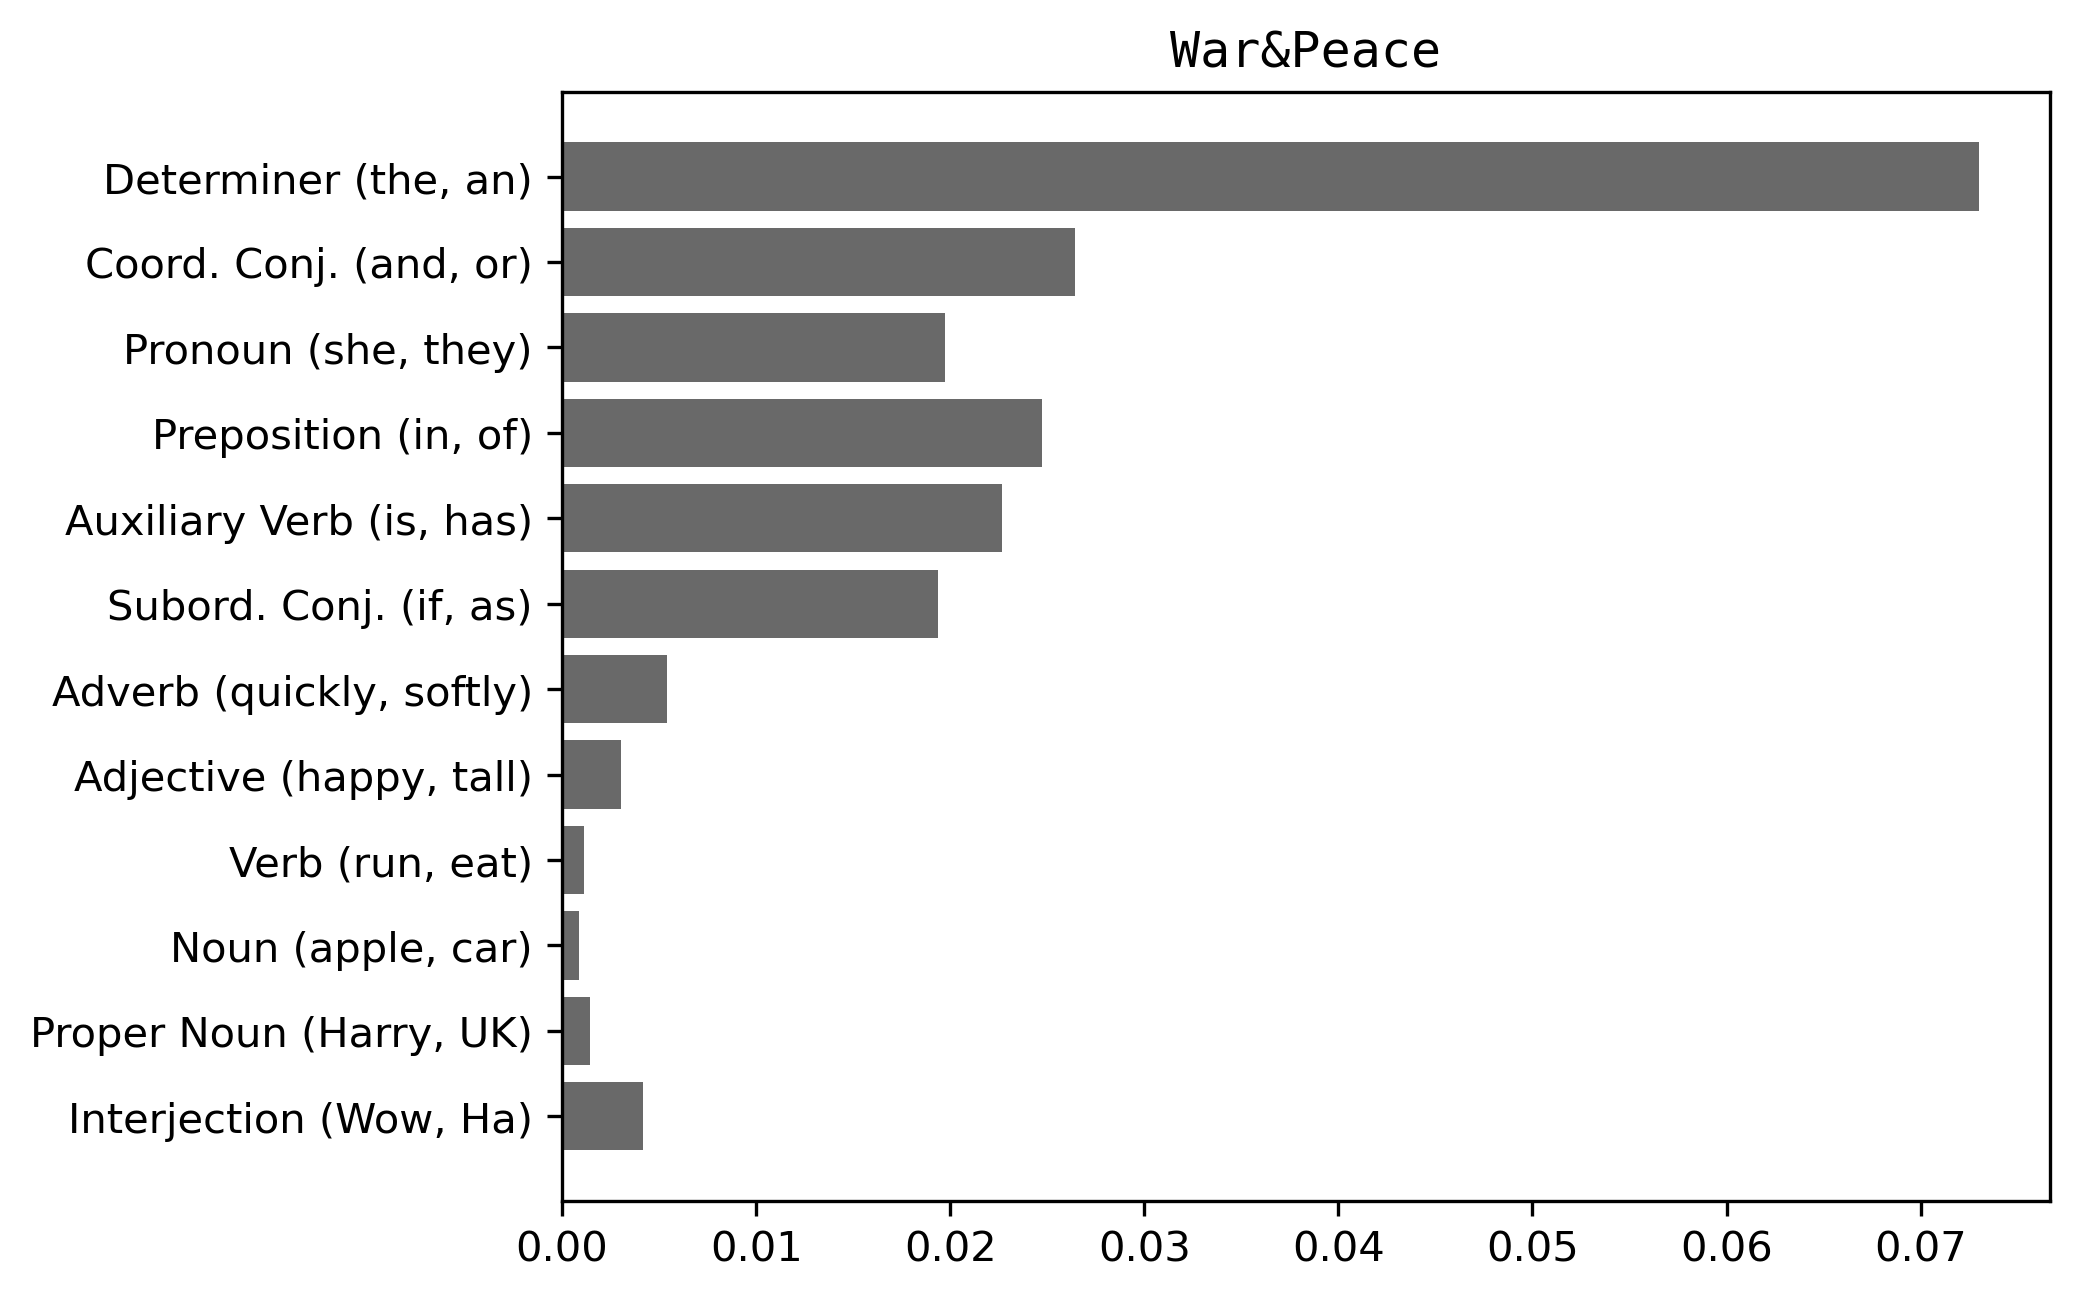

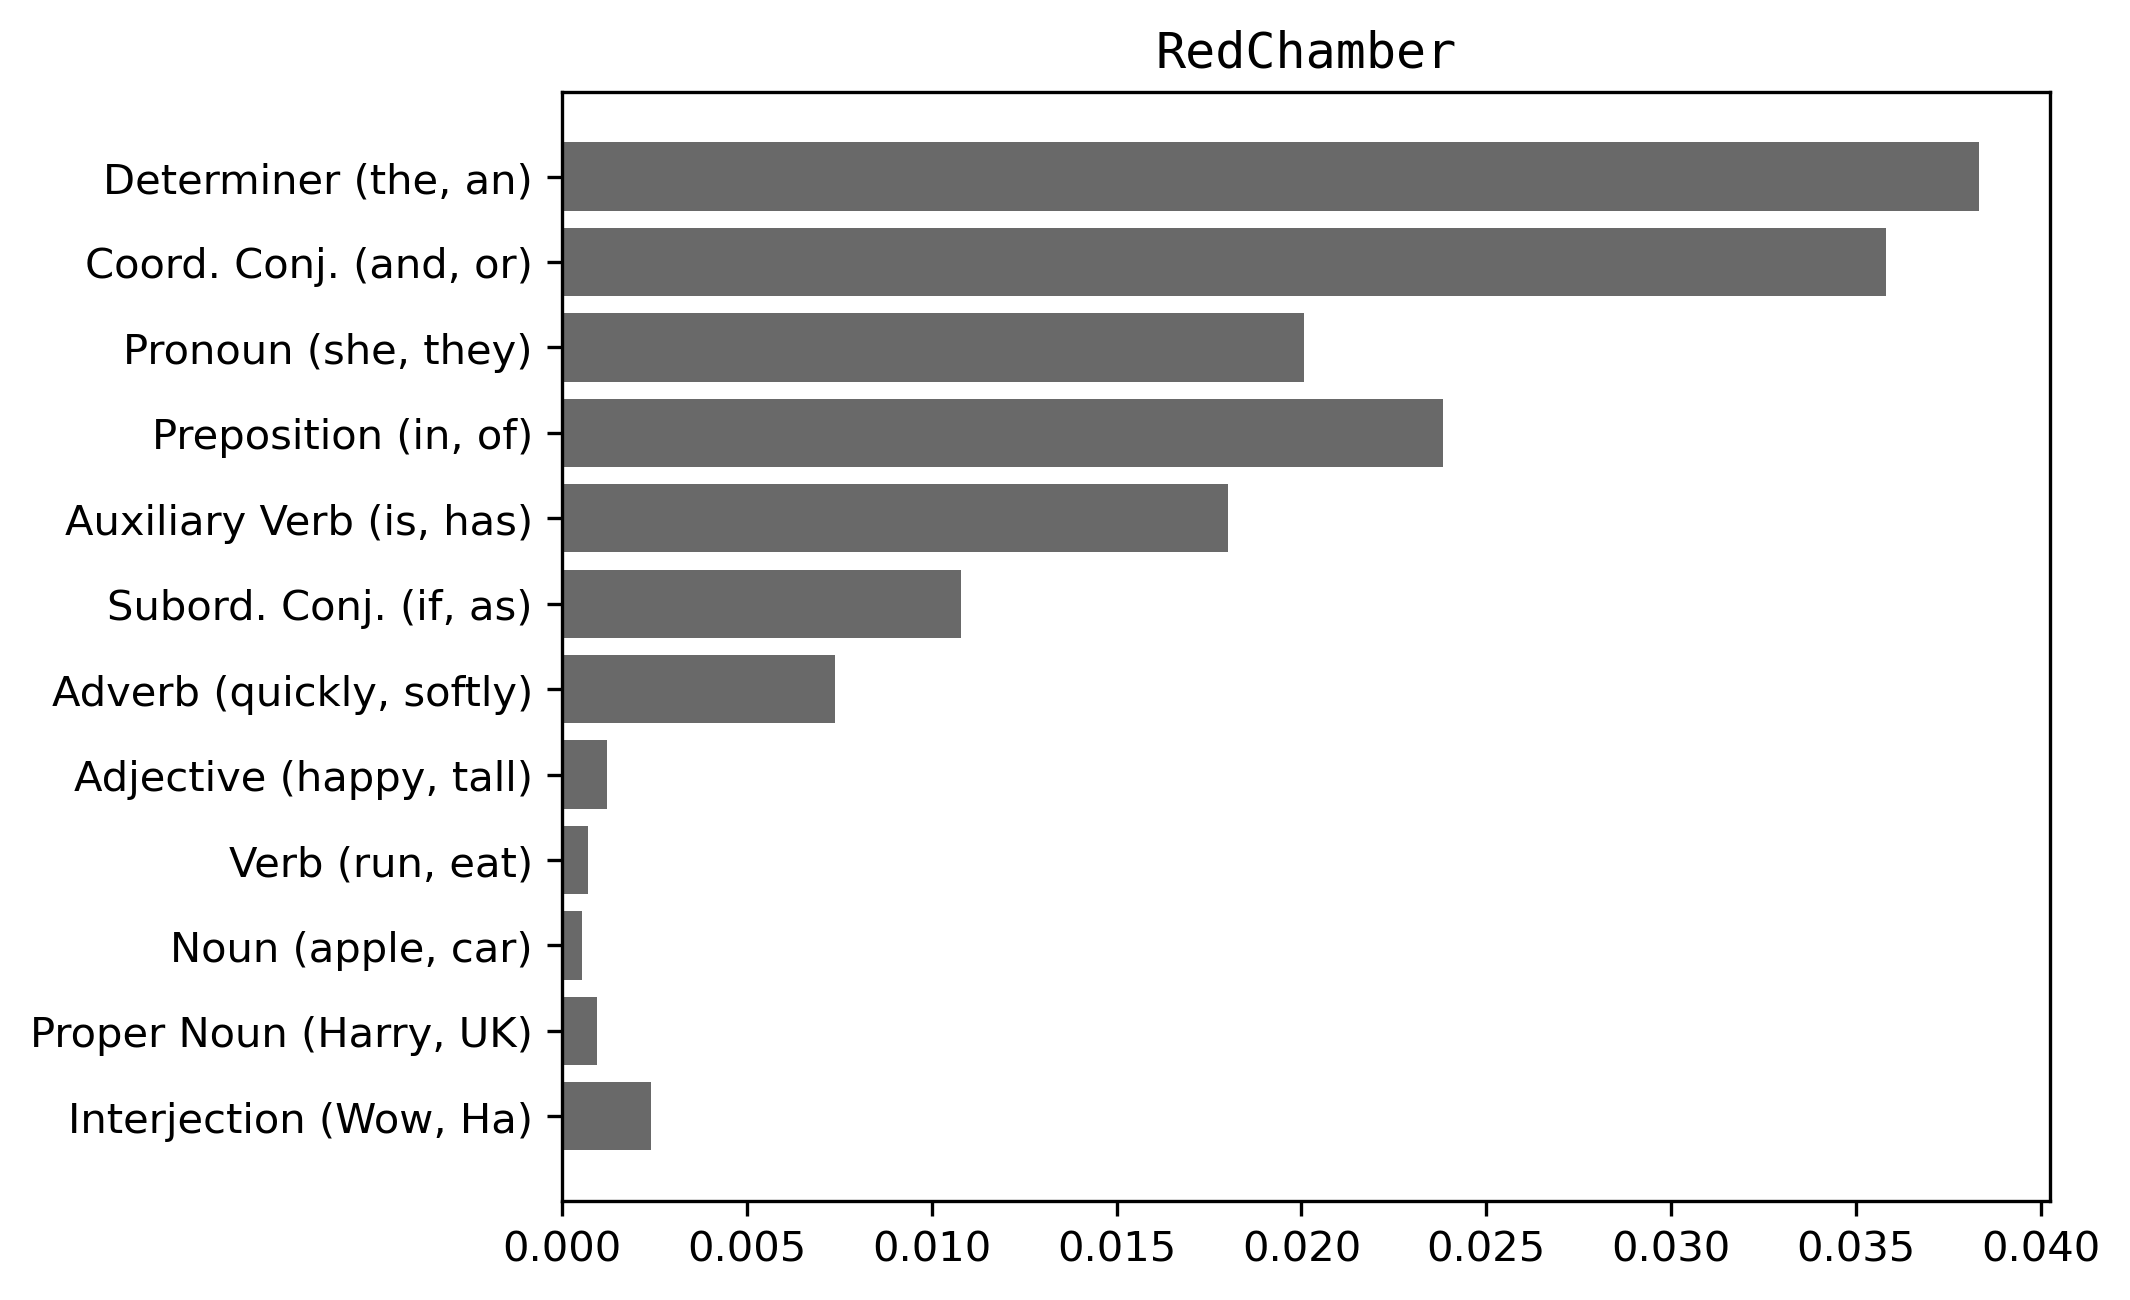

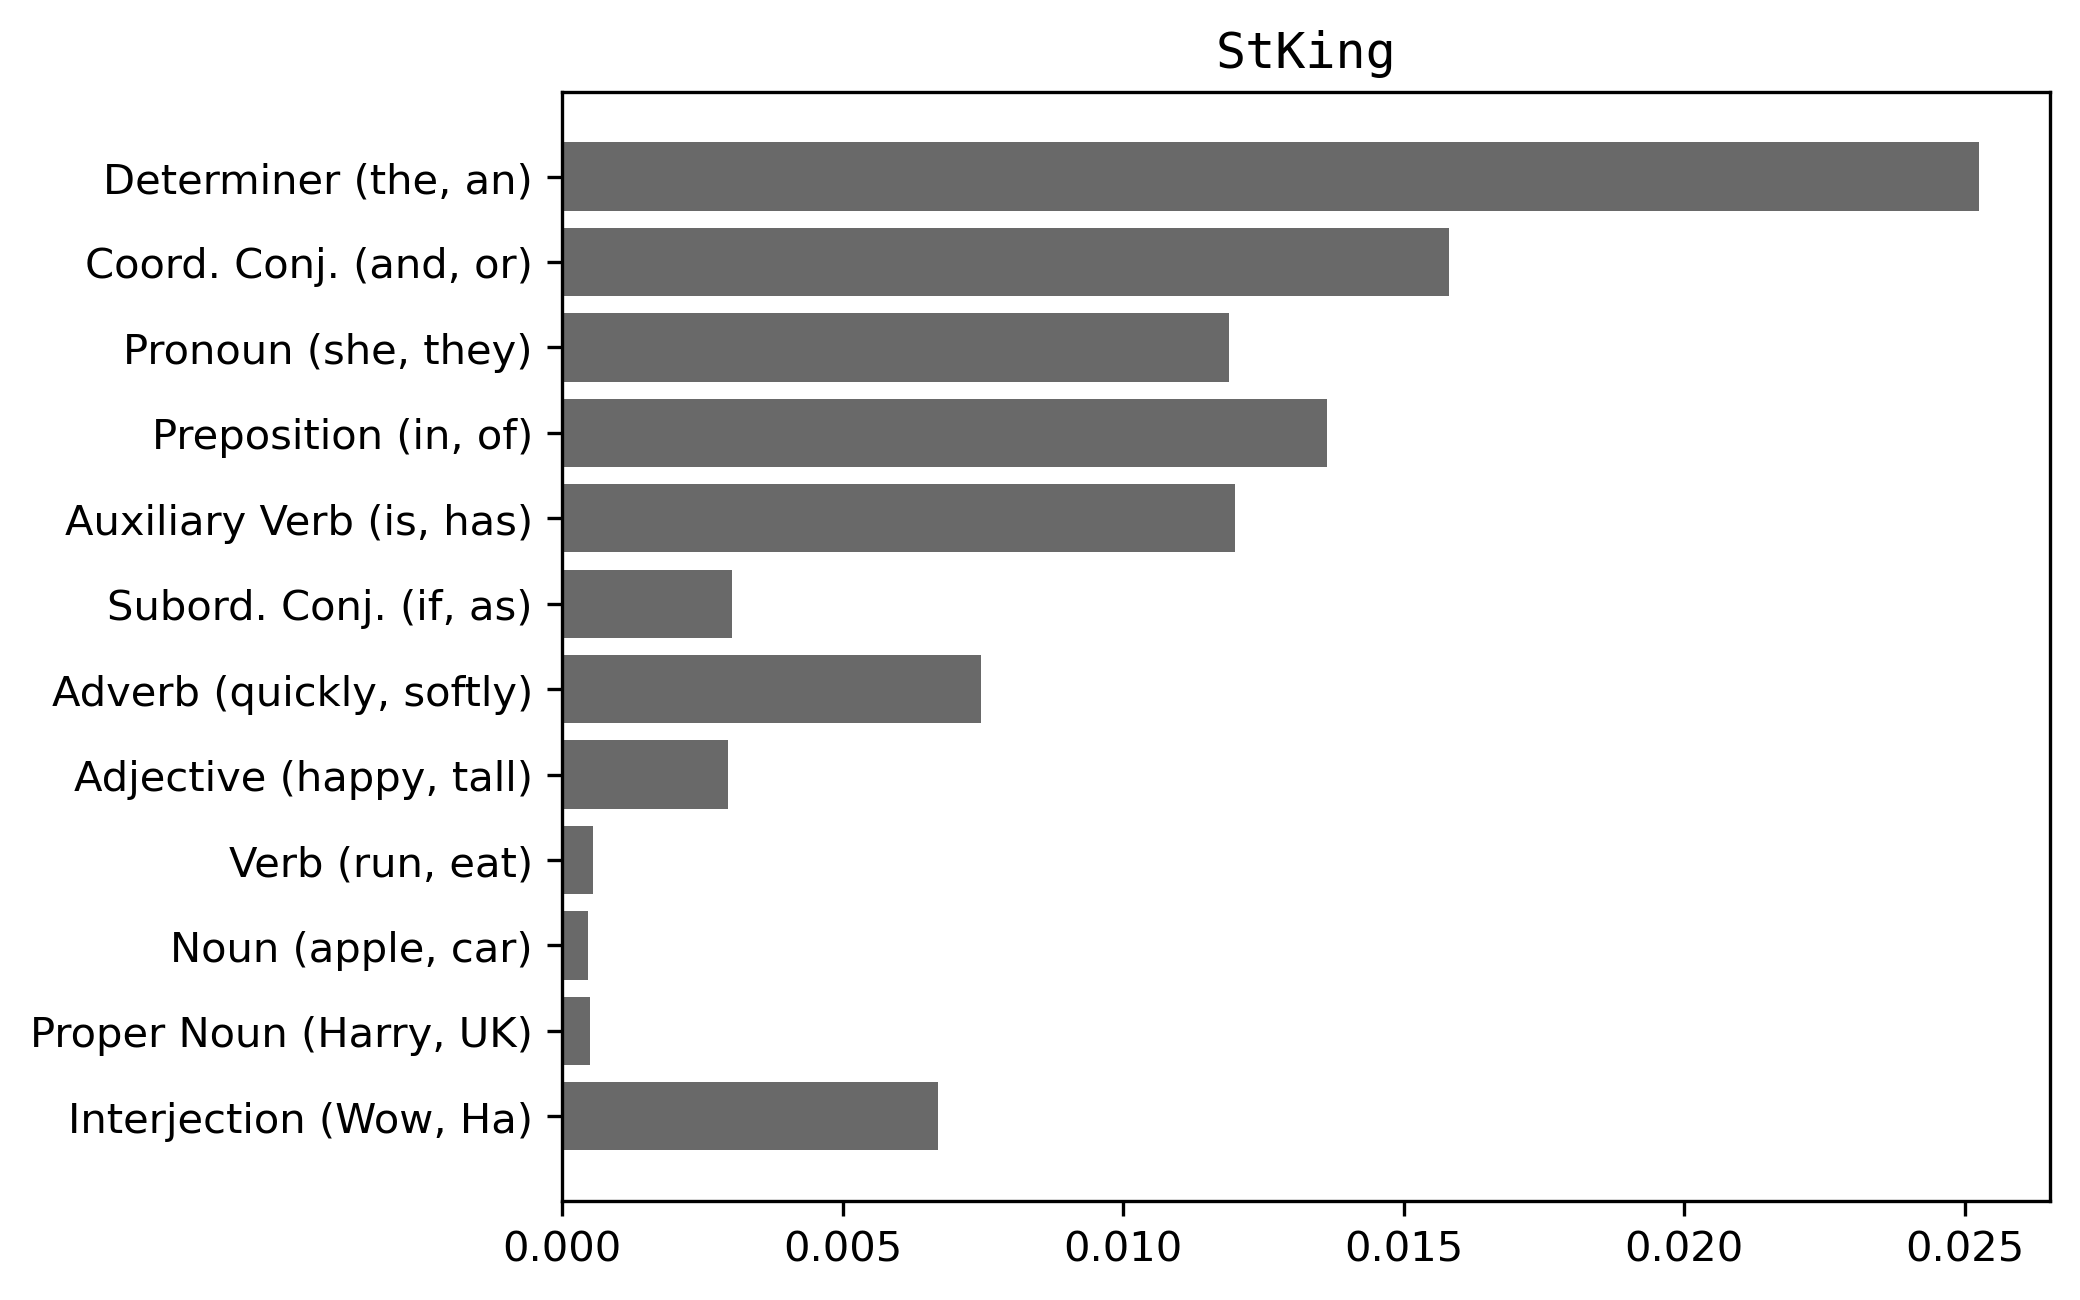

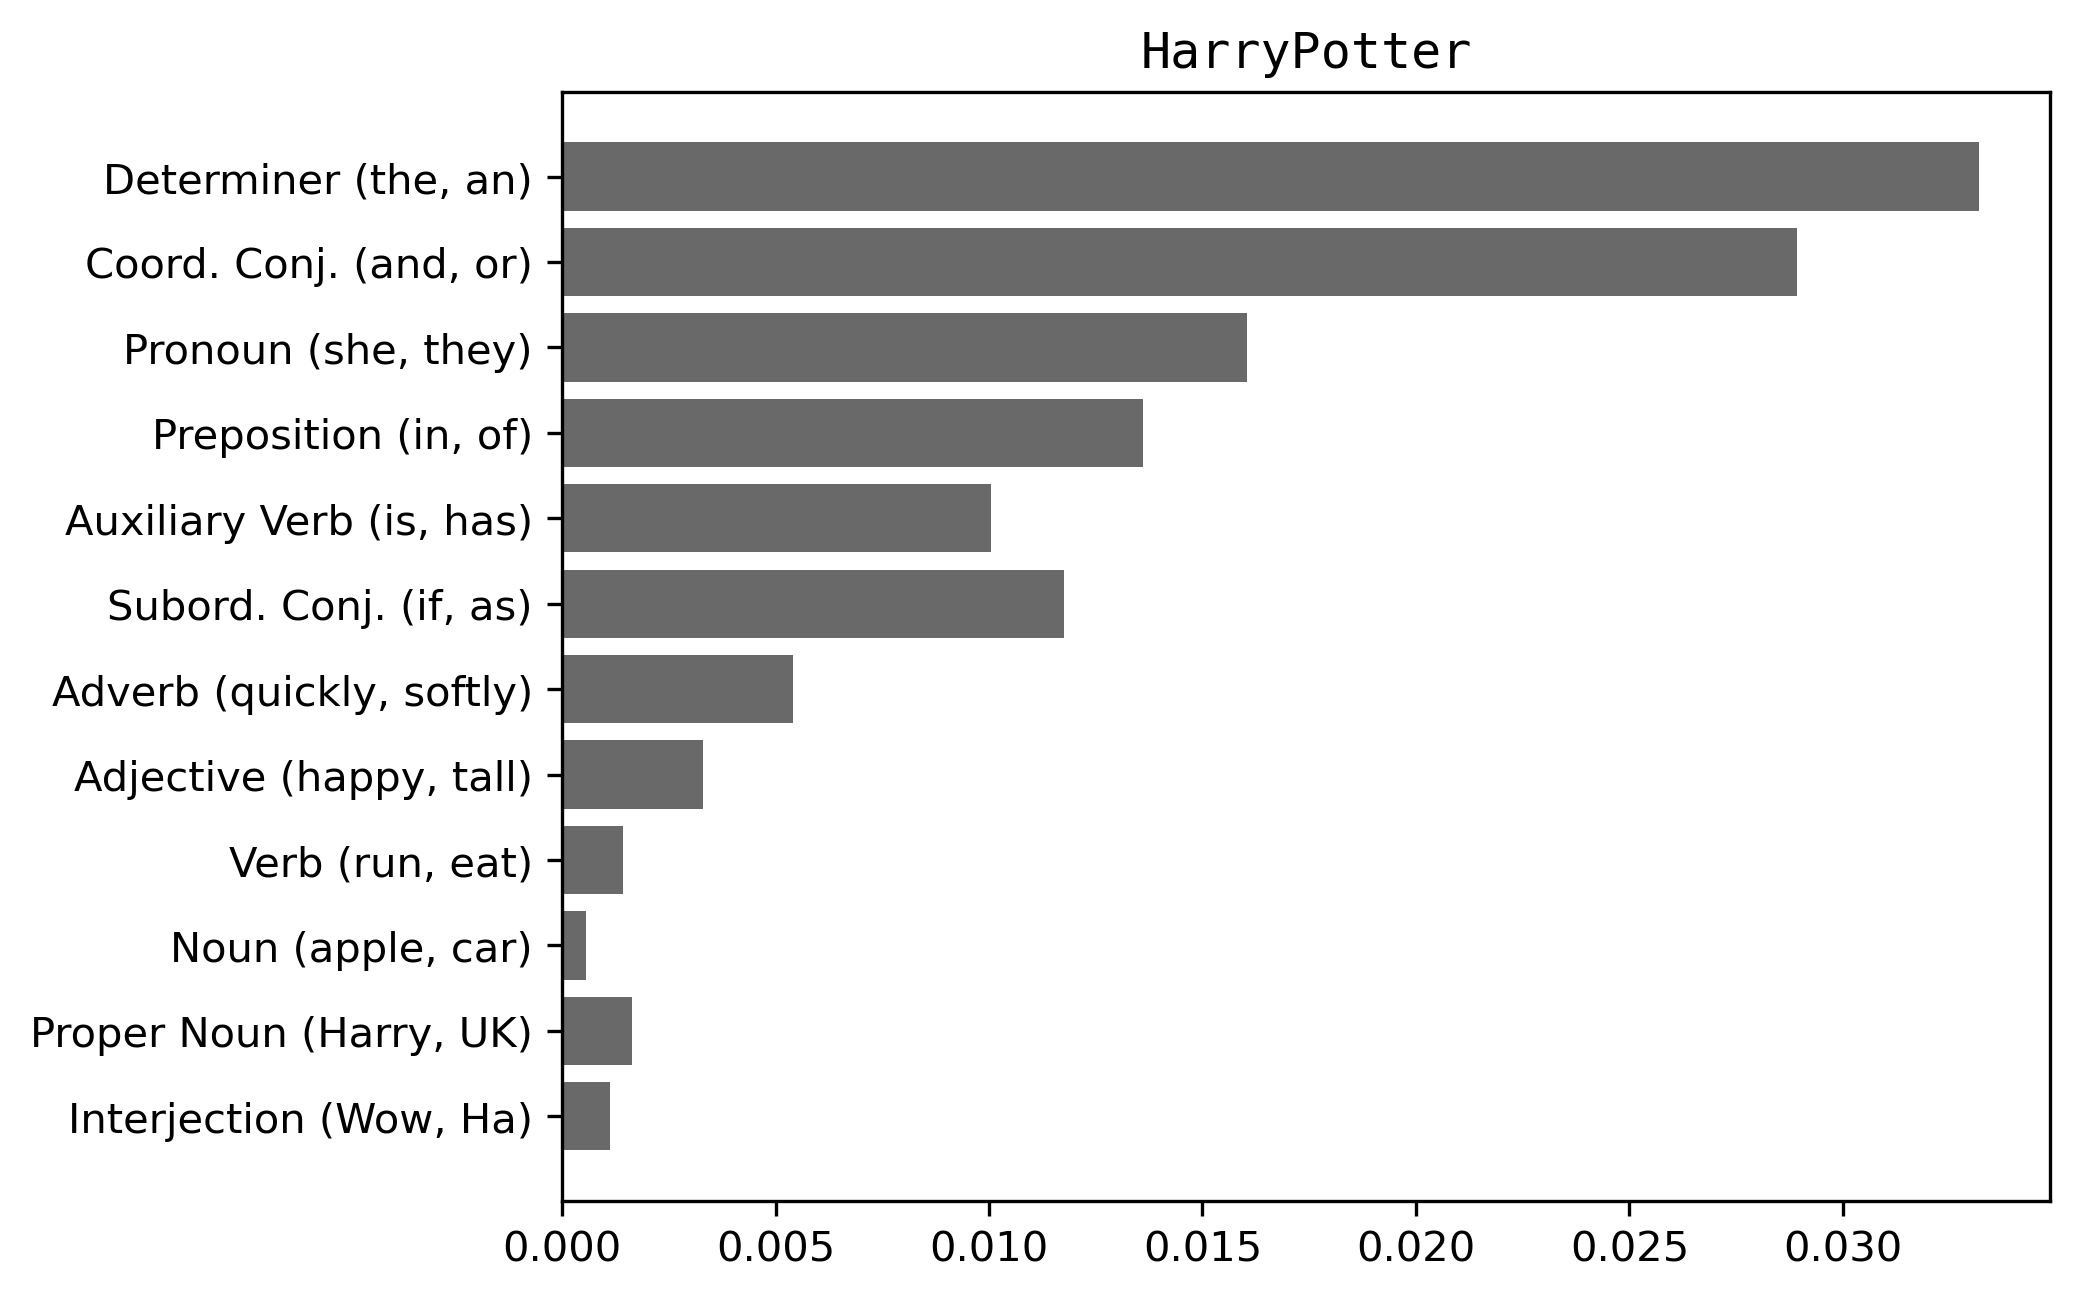

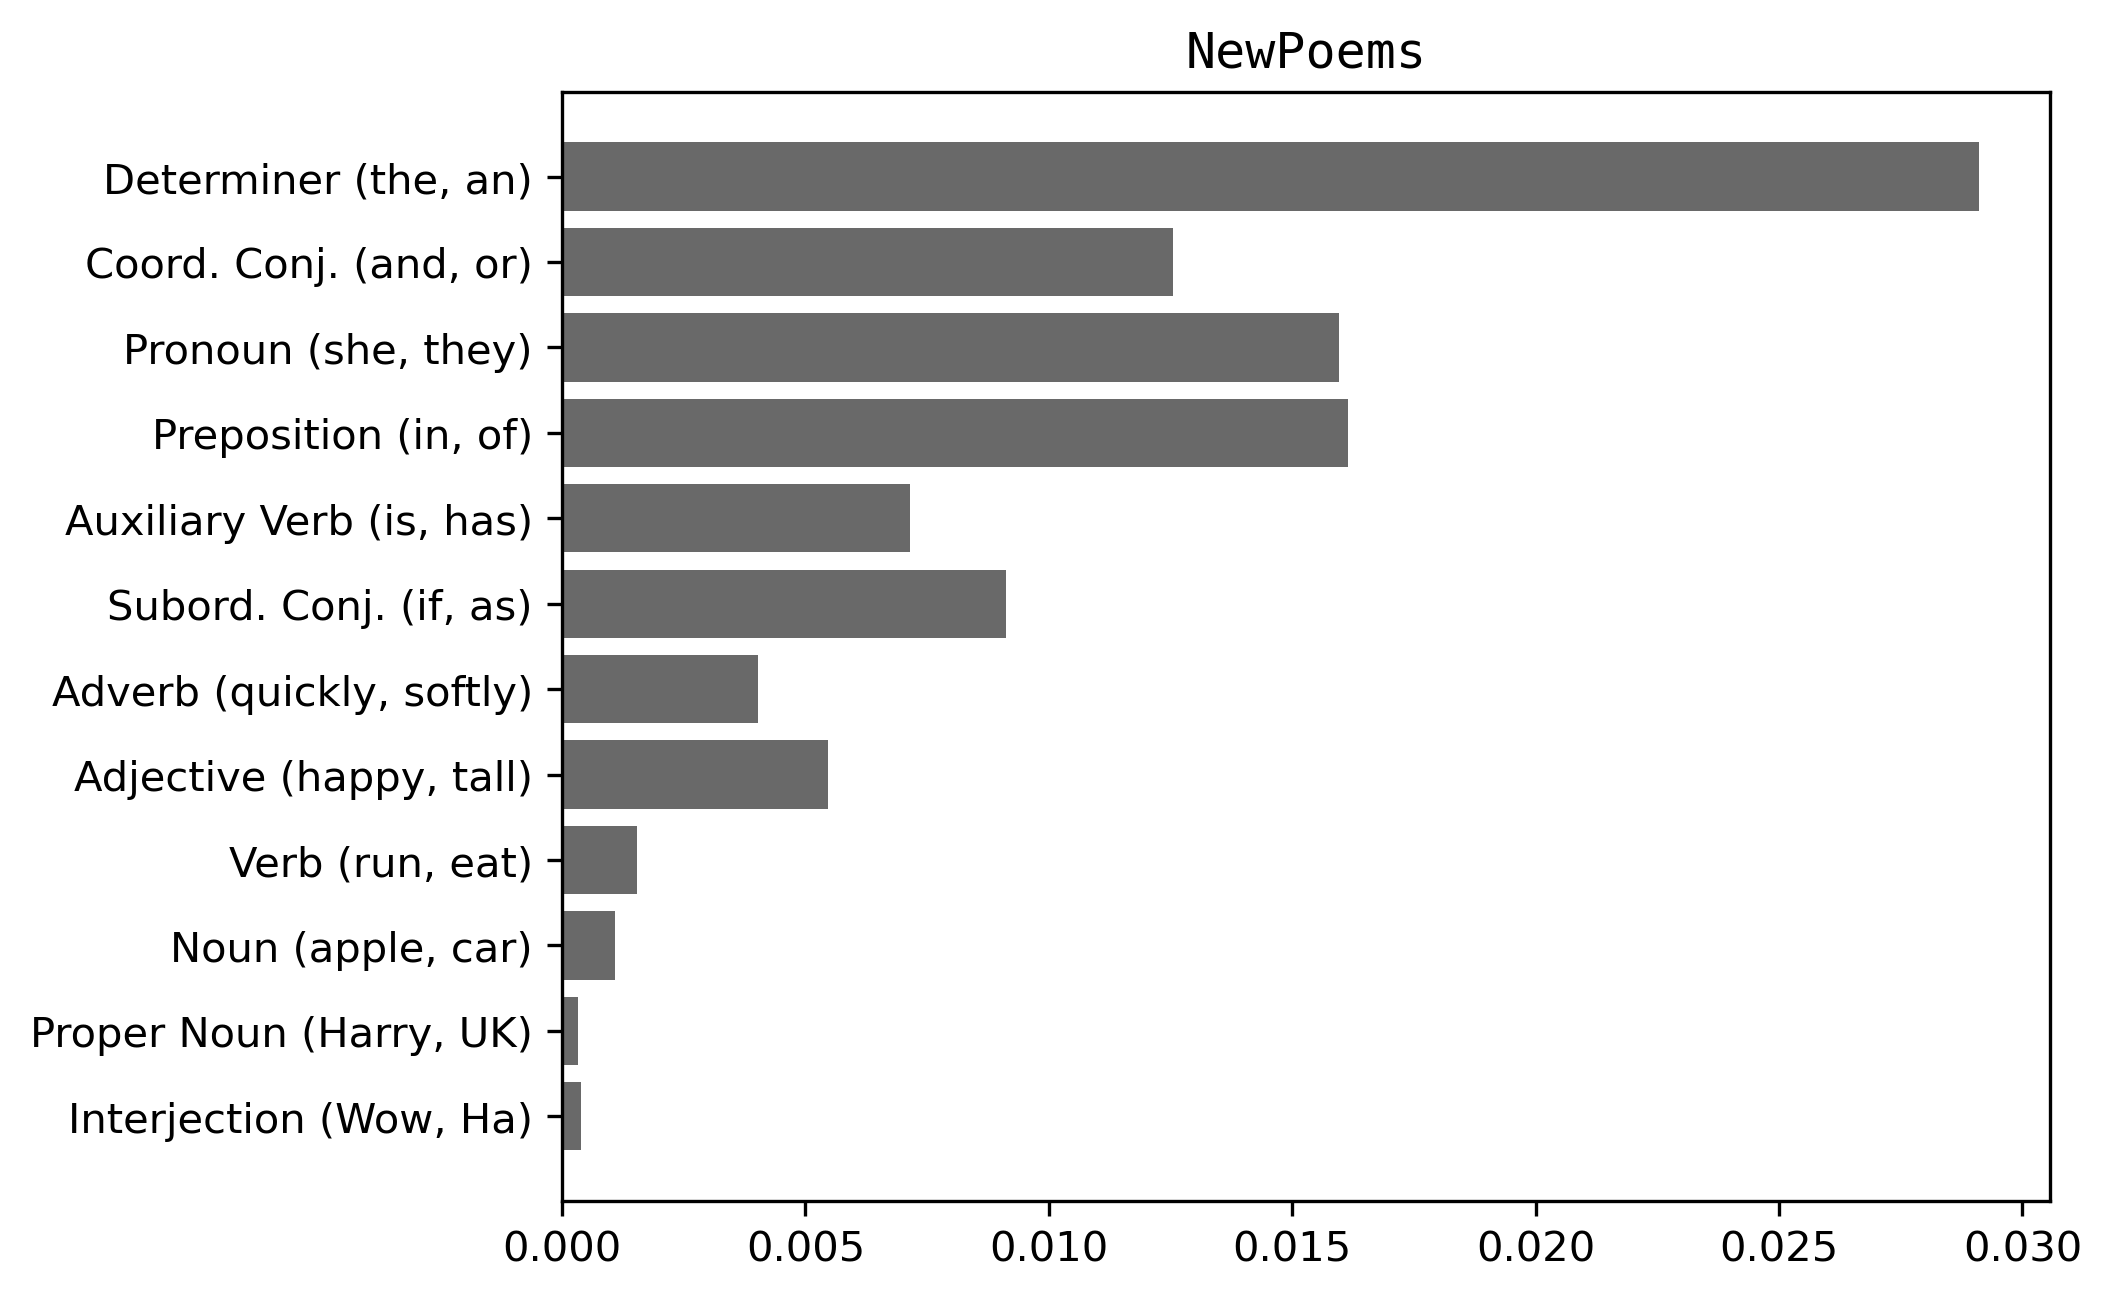

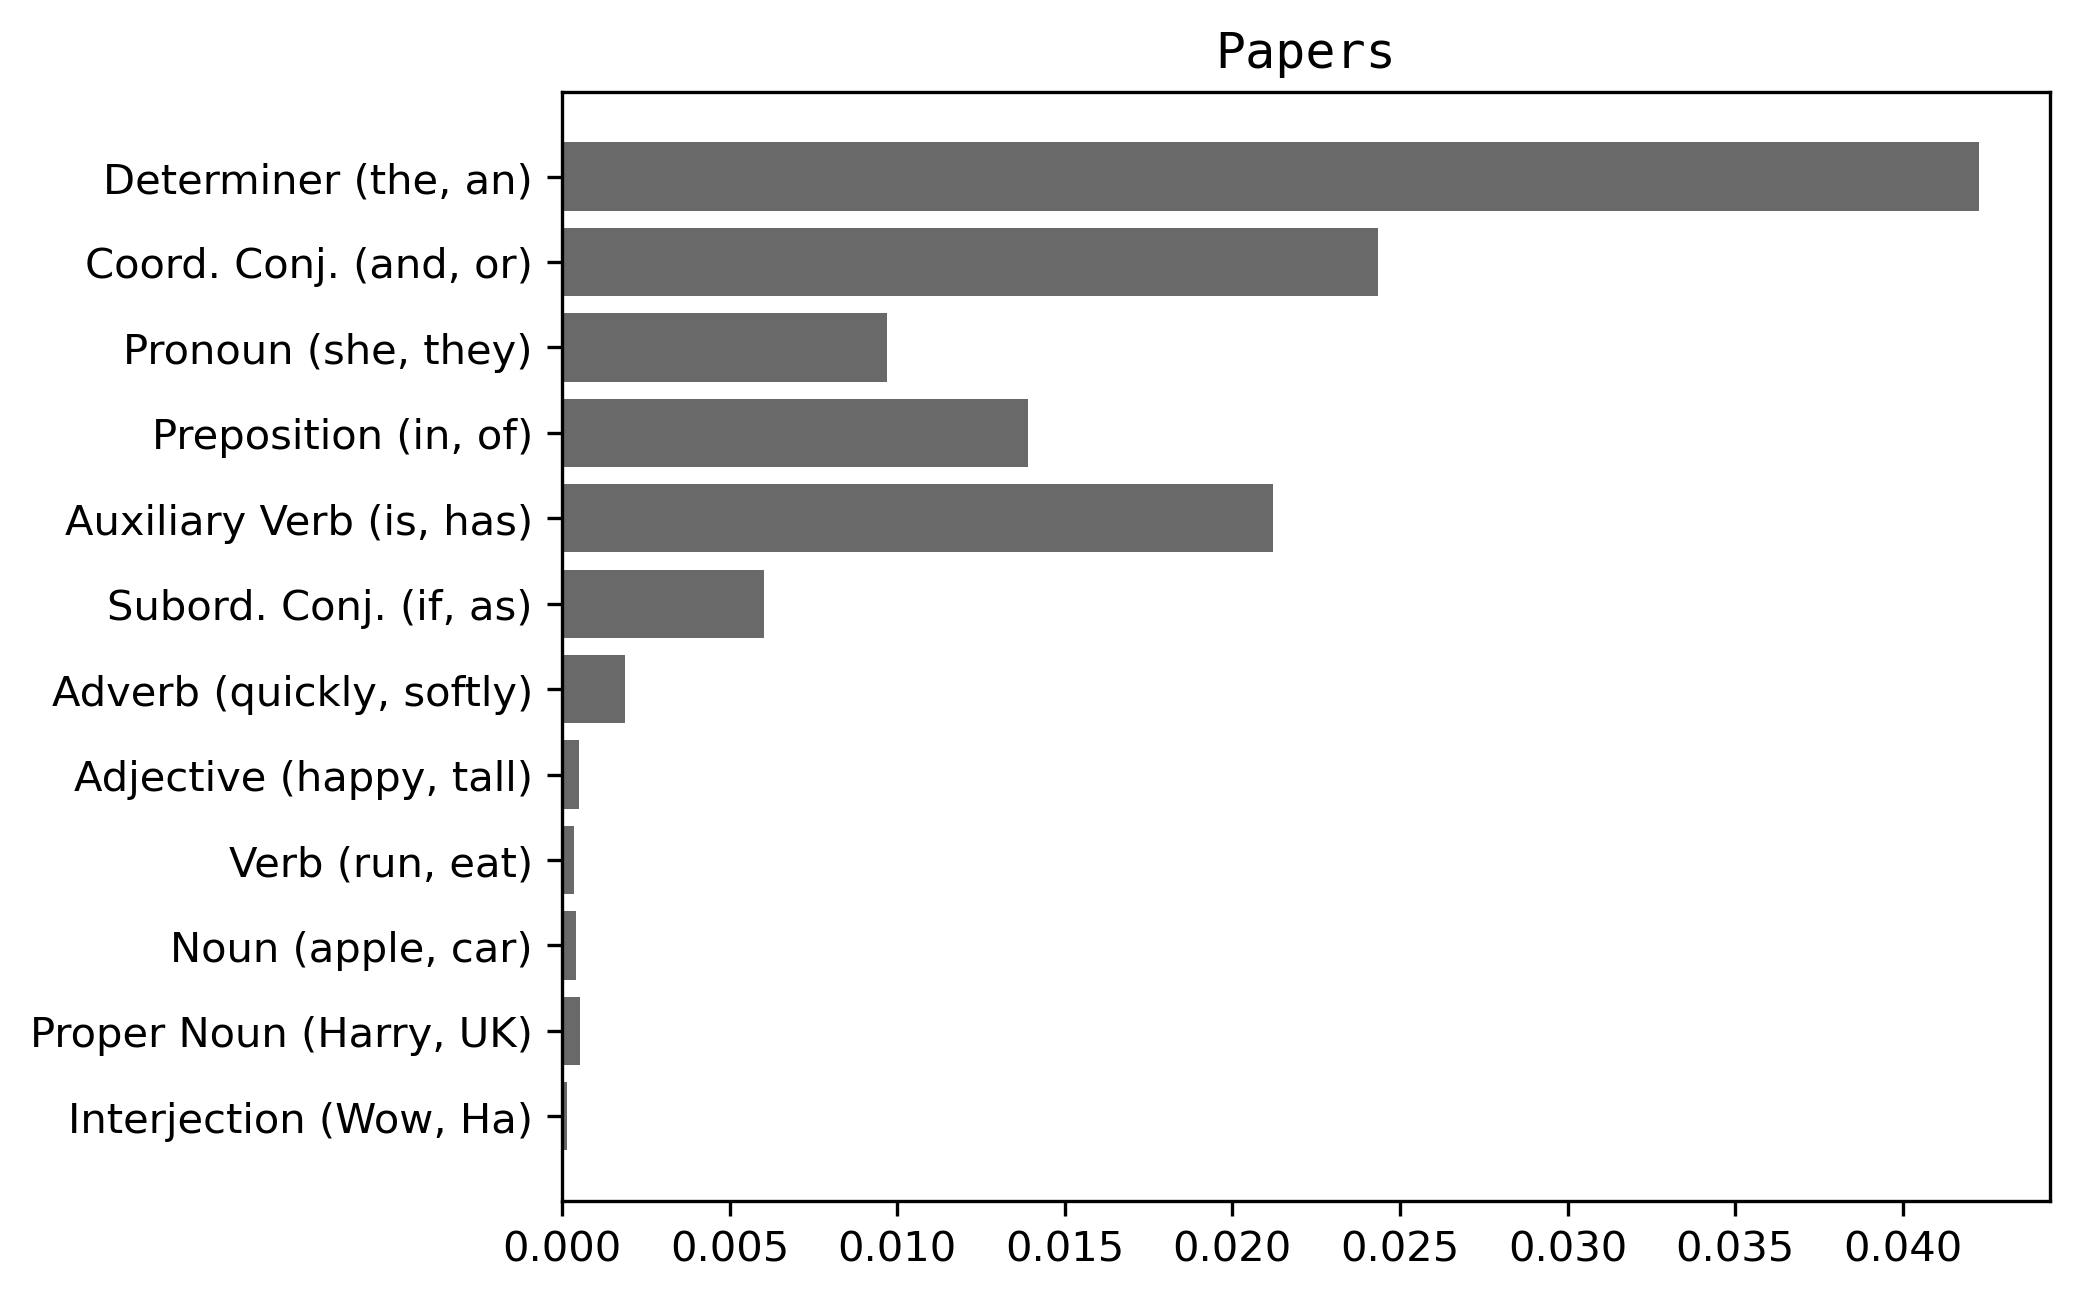

In [5]:
for book in books:
    plt.figure(dpi=300)
    plt.barh(classes.values(), [pos_dist_dict_book[book][k] for k in classes.keys()], color="dimgray")
    plt.title(books[book], fontname="DejaVu Sans Mono")
    plt.savefig(f"results/figs/books/{book}.pdf", bbox_inches="tight", pad_inches=0.02)
    plt.show()